In [1]:
import time
a = time.time()
import pandas as pd
import numpy as np

key = input('要爬蟲選1，預測投組選2: ')
if key == '1':
    from tool_class import Tool
    website = input('爬蟲網址 ex:https://www.rocketfinancial.com/Holdings.aspx?fID=250: ')
    f13_data = Tool.crawler(website)
    f13_data.to_csv('lone_pine.csv', index=False)
elif key == '2':
    import tool_class
    f13_data = pd.read_csv('lone_pine.csv')
    price_data = pd.read_csv('liquidity+highlow+class.csv', encoding='utf8', low_memory=False)
    industry = pd.read_csv('industry2.csv')
    asset = pd.read_csv('asset and book value.csv')

    date = input('本月月份(結果為預期下個月的投組): ')
    tool = tool_class.Tool(f13_data, price_data, industry, asset, date)

    feature_data = tool.training_set()
    b = time.time()
    print(b-a)
    testing_data = tool.testing_set()
    b = time.time()
    print(b-a)
    last_buy_count = len(feature_data[feature_data['buy']==1])
    not_buy_count = len(feature_data[feature_data['buy']==0])
    start = last_buy_count+1

    while start + last_buy_count * 3 < len(feature_data):
        t_data = pd.concat([feature_data[:last_buy_count],feature_data[start:start+int(last_buy_count*1.5)]])
        x = t_data[['volatility', 'liquidity', '52 week high', 'momentum', 'new_mom', 'new_52']].values
        y = t_data[['buy']].values
        x_test = testing_data[['volatility', 'liquidity', '52 week high', 'momentum', 'new_mom', 'new_52']].values
        svc_clf = tool.svc_model(x, y)
        if svc_clf is not False:
            y_pred = svc_clf.predict(x_test)
            testing_data.loc[:, 'svc'] = y_pred
            testing_data = testing_data[testing_data['svc']==1]
        x_test = testing_data[['volatility', 'liquidity', '52 week high', 'momentum', 'new_mom', 'new_52']].values
        rft_clf = tool.rft_model(x, y)
        if rft_clf is not False:
            y_pred = rft_clf.predict(x_test)
            testing_data.loc[:, 'rtf'] = y_pred
            testing_data = testing_data[testing_data['rtf']==1]
        start = start+int(last_buy_count*1.5)
    t_data = pd.concat([feature_data[:last_buy_count],feature_data[start:]])
    x = t_data[['volatility', 'liquidity', '52 week high', 'momentum', 'new_mom', 'new_52']].values
    y = t_data[['buy']].values
    x_test = testing_data[['volatility', 'liquidity', '52 week high', 'momentum', 'new_mom', 'new_52']].values
    svc_clf = tool.svc_model(x, y)
    if svc_clf is not False:
        y_pred = svc_clf.predict(x_test)
        testing_data.loc[:, 'svc'] = y_pred
        testing_data = testing_data[testing_data['svc']==1]
    x_test = testing_data[['volatility', 'liquidity', '52 week high', 'momentum', 'new_mom', 'new_52']].values
    rft_clf = tool.rft_model(x, y)
    if rft_clf is not False:
        y_pred = rft_clf.predict(x_test)
        testing_data.loc[:, 'rtf'] = y_pred
        testing_data = testing_data[testing_data['rtf']==1]

    print(list(testing_data['ticker']))
    
b = time.time()
print(b-a)

要爬蟲選1，預測投組選2: 2
本月月份(結果為預期下個月的投組): 200704


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


37.97752523422241
41.82097005844116


ValueError: Found array with 0 sample(s) (shape=(0, 6)) while a minimum of 1 is required.

In [2]:
a_date = []
for i in range(200501, 201913, 1):
    i = str(i)
    if 1 <= int(i[4:]) <= 12:
        a_date.append(i)

In [ ]:
import time
import pandas as pd
import numpy as np
import tool_class
f13_data = pd.read_csv('lone_pine.csv')
price_data = pd.read_csv('liquidity+highlow+class.csv', encoding='utf8', low_memory=False)
industry = pd.read_csv('industry2.csv')
asset = pd.read_csv('asset and book value.csv')
our_revenue = []
lone_pine_revenue = []
error_date = []
final_df = pd.DataFrame()
for index in range(0, len(a_date)-1, 1):
    c = time.time()
    f13_data1 = f13_data.copy()
    price_data1 = price_data.copy()
    industry1 = industry.copy()
    asset1 = asset.copy()
    date = str(a_date[index])
    print(date)
    if int(date[4:]) == 1 or int(date[4:]) == 11:
        seanson_date = str(int(date[0:4])-1) + '12'
    elif int(date[4:]) == 4 or int(date[4:]) == 2:
        seanson_date = date[0:4] + '03'
    elif int(date[4:]) == 7 or int(date[4:]) == 5:
        seanson_date = date[0:4] + '06'
    elif int(date[4:]) == 10 or int(date[4:]) == 8:
        seanson_date = date[0:4] + '09'
    else:
        seanson_date = date
    tool = tool_class.Tool(f13_data1, price_data1, industry1, asset1, date)

    feature_data = tool.training_set()

    testing_data = tool.testing_set()

    last_buy_count = len(feature_data[feature_data['buy']==1])
    not_buy_count = len(feature_data[feature_data['buy']==0])
    start = last_buy_count+1
    
    try:
        testing_len = len(testing_data)
        while start + last_buy_count * 3 < len(feature_data):# 比例
            t_data = pd.concat([feature_data[:last_buy_count],feature_data[start:int(start+last_buy_count*1.5)]])# 比例
            x = t_data[['volatility', 'liquidity', '52 week high', 'momentum']].values
            y = t_data[['buy']].values
            x_test = testing_data[['volatility', 'liquidity', '52 week high', 'momentum', 'new_mom', 'new_52']].values
            svc_clf = tool.svc_model(x, y)
            if svc_clf is not False:
                y_pred = svc_clf.predict(x_test)
                testing_data.loc[:, 'svc'] = y_pred
                testing_data = testing_data[testing_data['svc']==1]
            x_test = testing_data[['volatility', 'liquidity', '52 week high', 'momentum', 'new_mom', 'new_52']].values
            rft_clf = tool.rft_model(x, y)
            if rft_clf is not False:
                y_pred = rft_clf.predict(x_test)
                testing_data.loc[:, 'rtf'] = y_pred
                testing_data = testing_data[testing_data['rtf']==1]
            start = start+int(last_buy_count*1.5)# 比例
        
        t_data = pd.concat([feature_data[:last_buy_count],feature_data[start:]])
        x = t_data[['volatility', 'liquidity', '52 week high', 'momentum', 'new_mom', 'new_52']].values
        y = t_data[['buy']].values
        x_test = testing_data[['volatility', 'liquidity', '52 week high', 'momentum', 'new_mom', 'new_52']].values
        svc_clf = tool.svc_model(x, y)
        if svc_clf is not False:
            y_pred = svc_clf.predict(x_test)
            testing_data.loc[:, 'svc'] = y_pred
            testing_data = testing_data[testing_data['svc']==1]
        x_test = testing_data[['volatility', 'liquidity', '52 week high', 'momentum', 'new_mom', 'new_52']].values
        rft_clf = tool.rft_model(x, y)
        if rft_clf is not False:
            y_pred = rft_clf.predict(x_test)
            testing_data.loc[:, 'rtf'] = y_pred
            testing_data = testing_data[testing_data['rtf']==1]
        
        if testing_len != len(testing_data):
            df = pd.DataFrame({'date':str(a_date[index+1]), 'ticker':list(testing_data['ticker']), 'class':list(testing_data['class'])})
            final_df = pd.concat([final_df, df], ignore_index=True, sort=False)

            test = tool.price_data.merge(testing_data[['ticker', 'class']], left_on=['Ticker', 'Class'], right_on=['ticker', 'class'])
#             now_df = test[test['Date']==date]# equal-weight
#             next_df = test[test['Date']==str(a_date[index+1])]# equal-weight
#             next_df = next_df[['Ticker', 'Class', 'PRC']]# equal-weight
#             next_df.columns = ['Ticker', 'Class', 'next_PRC']# equal-weight
#             price_df = now_df.merge(next_df, on=['Ticker', 'Class'])# equal-weight
#             price_df.loc[:, 'revenue'] = price_df['next_PRC'] / price_df['PRC']# equal-weight
#             our_revenue.append(sum(price_df['revenue']) / len(price_df))# equal-weight
            our_revenue.append(sum(test[test['Date']==str(a_date[index+1])]['PRC'])/sum(test[test['Date']==date]['PRC']))# price-weight


            def abcd(df_col):
                if df_col == 'A':
                    return df_col
                else:
                    return 0
            tdf = tool.f13_data[tool.f13_data['Date']==seanson_date][['Ticker', 'Class']]
            tdf['Class'] = tdf['Class'].apply(abcd)
            test1 = tool.price_data.merge(tdf, on=['Ticker', 'Class'])
#             now_df = test1[test1['Date']==date]# equal-weight
#             next_df = test1[test1['Date']==str(a_date[index+1])]# equal-weight
#             next_df = next_df[['Ticker', 'Class', 'PRC']]# equal-weight
#             next_df.columns = ['Ticker', 'Class', 'next_PRC']# equal-weight
#             price_df = now_df.merge(next_df, on=['Ticker', 'Class'])# equal-weight
#             price_df.loc[:, 'revenue'] = price_df['next_PRC'] / price_df['PRC']# equal-weight
#             lone_pine_revenue.append(sum(price_df['revenue']) / len(price_df))# equal-weight
            lone_pine_revenue.append(sum(list(test1[test1['Date']==str(a_date[index+1])]['PRC'])) / sum(list(test1[test1['Date']==date]['PRC'])))# price-weight
        else:
            print(date,'no filter')
            error_date.append(date)
    except:
        print(date,'no data')
        error_date.append(date)
    
    b = time.time()
    print(b-c)

200501


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


37.893991231918335
200502


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


39.33274841308594
200503


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


36.93185329437256
200504


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


24.06183934211731
200505


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


24.347285985946655
200506


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


24.152857780456543
200507


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


21.36775302886963
200508


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


21.41848587989807
200509


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


21.44689679145813
200510


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


17.643792390823364
200511


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


17.3404438495636
200512


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


200512 no data
17.33301043510437
200601


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


16.806140899658203
200602


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


16.70428228378296
200603


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


16.620408058166504
200604


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


16.32186532020569
200605


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


200605 no data
15.915701866149902
200606


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


16.228068590164185
200607


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


200607 no data
19.45066547393799
200608


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


19.756118297576904
200609


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


20.158124446868896
200610


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


20.502665519714355
200611


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


20.550269842147827
200612


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


20.77758479118347
200701


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


20.968966484069824
200702


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


200702 no data
20.278460264205933
200703


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


20.13569402694702
200704


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


200704 no data
19.653113842010498
200705


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


200705 no data
19.806399822235107
200706


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


20.062926292419434
200707


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


200707 no data
20.33919668197632
200708


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


19.9542076587677
200709


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


200709 no data
19.669474363327026
200710


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


200710 no data
19.511301517486572
200711


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


200711 no data
19.468165397644043
200712


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


19.80426812171936
200801


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


200801 no data
19.288822412490845
200802


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


19.398204803466797
200803


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


19.269553661346436
200804


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


200804 no data
19.196994066238403
200805


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


200805 no data
19.285086631774902
200806


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


19.522420644760132
200807


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


200807 no data
22.956764459609985
200808


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


200808 no data
22.318784475326538
200809


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


22.729594230651855
200810


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


200810 no data
25.731894969940186
200811


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


26.0779812335968
200812


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


25.575809478759766
200901


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


25.43008804321289
200902


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


25.225719213485718
200903


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


25.115747928619385
200904


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


25.38999319076538
200905


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


25.356894731521606
200906


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


25.23627495765686
200907


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


200907 no data
22.146061182022095
200908


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


22.11490511894226
200909


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


200909 no data
14.56824016571045
200910


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


19.42231059074402
200911


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


5069.719861745834
200912


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


200912 no data
19.912672519683838
201001


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


20.072001457214355
201002


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


19.71192169189453
201003


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


19.546307802200317
201004


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


18.948968410491943
201005


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201005 no data
18.752230405807495
201006


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201006 no data
19.307288885116577
201007


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


19.258938312530518
201008


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201008 no data
18.999064207077026
201009


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201009 no data
18.80709743499756
201010


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201010 no data
22.023214101791382
201011


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


21.746851205825806
201012


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


22.108582258224487
201101


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


18.426631689071655
201102


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


18.466379165649414
201103


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201103 no data
18.66376829147339
201104


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201104 no data
19.307318925857544
201105


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


19.28326106071472
201106


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


19.616199254989624
201107


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201107 no data
19.477401971817017
201108


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


19.802677631378174
201109


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


19.795137882232666
201110


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201110 no data
19.74297547340393
201111


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


19.656237602233887
201112


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


20.09267497062683
201201


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201201 no data
20.136982679367065
201202


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


19.940799474716187
201203


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


20.13778281211853
201204


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201204 no data
16.214568376541138
201205


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


16.613492012023926
201206


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201206 no data
16.292304039001465
201207


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


15.594655990600586
201208


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201208 no data
15.569638013839722
201209


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201209 no data
15.371918678283691
201210


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


14.415265798568726
201211


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201211 no data
15.152591705322266
201212


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201212 no data
14.604625940322876
201301


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


15.47031855583191
201302


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


15.262694597244263
201303


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201303 no data
15.337414503097534
201304


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201304 no data
15.164308547973633
201305


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201305 no data
15.471357345581055
201306


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


15.653565645217896
201307


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201307 no data
15.499889612197876
201308


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


15.532338857650757
201309


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201309 no data
15.732691526412964
201310


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


20.33080220222473
201311


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201311 no data
19.93621587753296
201312


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


20.093156814575195
201401


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


20.001911401748657
201402


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201402 no data
19.967885732650757
201403


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201403 no data
20.363372564315796
201404


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201404 no data
19.997217893600464
201405


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201405 no data
20.109566926956177
201406


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201406 no data
19.578604698181152
201407


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201407 no data
19.420069217681885
201408


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


19.47057580947876
201409


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


20.479936599731445
201410


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201410 no data
19.525352478027344
201411


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201411 no data
19.501652479171753
201412


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


19.64449691772461
201501


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201501 no data
19.181588411331177
201502


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201502 no data
19.29207134246826
201503


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


19.298778533935547
201504


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201504 no data
19.27324104309082
201505


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201505 no data
19.140700340270996
201506


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201506 no data
19.04524517059326
201507


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


19.554600715637207
201508


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201508 no data
19.43703532218933
201509


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


19.623884677886963
201510


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201510 no data
19.53117823600769
201511


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


19.54572606086731
201512


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201512 no data
20.238273859024048
201601


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201601 no data
20.927778005599976
201602


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


21.00624394416809
201603


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201603 no data
20.852715015411377
201604


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


20.855469226837158
201605


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201605 no data
20.670138120651245
201606


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201606 no data
20.979185581207275
201607


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201607 no data
21.04754638671875
201608


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


21.323842525482178
201609


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201609 no data
20.94180154800415
201610


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201610 no data
21.119996309280396
201611


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201611 no data
21.366984605789185
201612


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201612 no data
20.92543315887451
201701


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


20.282543897628784
201702


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201702 no data
20.044009685516357
201703


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201703 no data
20.693230390548706
201704


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201704 no data
20.157440900802612
201705


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


20.091941833496094
201706


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201706 no data
19.65731692314148
201707


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201707 no data
19.688888788223267
201708


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201708 no data
20.597665548324585
201709


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201709 no data
19.757262706756592
201710


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


24.60292410850525
201711


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201711 no data
24.198874950408936
201712


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


23.574475526809692
201801


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201801 no data
18.57492685317993
201802


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201802 no data
18.385901927947998
201803


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201803 no data
18.593592405319214
201804


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201804 no data
18.280378580093384
201805


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201805 no data
18.001070499420166
201806


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201806 no data
18.306366682052612
201807


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201807 no data
21.690638542175293
201808


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201808 no data
22.115026712417603
201809


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201809 no data
22.02090620994568
201810


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


21.371628046035767
201811


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201811 no data
21.77830481529236
201812


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201812 no data
22.851572513580322
201901


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [3]:
feature_data[feature_data['buy']==1]

,ticker,class,volatility,liquidity,52 week high,momentum,new_52,new_mom,buy
0,ADBE,0,813790.0,1.668755,1.644324,1.068183,0.821228,0.981829,1
1,ADSK,0,511872.0,2.337219,1.514451,1.051375,0.818130,1.008468,1
2,AMZN,0,1393304.0,2.849473,1.798589,1.008797,0.736437,0.958295,1
3,ATVI,0,2455742.0,3.218320,1.696988,0.850249,0.558460,0.740352,1
4,BABA,0,4563960.0,4.019301,1.580897,0.850474,0.650052,1.031374,1
5,CP,0,126167.0,0.884749,1.299009,1.077932,0.797289,1.009770,1
6,CRM,0,1657478.0,2.166638,1.606710,1.073983,0.853768,0.975514,1
7,CSX,0,1036978.0,1.228036,1.495938,1.103365,0.822914,1.010903,1
8,EA,0,963326.0,3.188459,1.801500,0.747773,0.529846,0.853387,1
9,FLT,0,162563.0,1.844038,1.259898,0.953134,0.815133,0.933893,1


In [4]:
our_revenue

[1.0611416433303096,
 1.0750653824073484,
 1.0573481759708858,
 1.1050445678284515,
 1.0739271375464683,
 1.1167196834510045,
 1.0575311836601389,
 1.0930477694123444,
 1.0473179852991472,
 1.1011831684360032,
 1.1124919786096255,
 1.1484886267066148,
 1.082857041428521,
 1.119950833895691,
 1.08062660711869,
 1.103352681278697,
 1.0827335929376745,
 1.076295363421404,
 1.0840364468979364,
 1.0920186653719588,
 1.1248243181054964,
 1.1014190016567027,
 1.0759574265713168,
 1.1190703540221598,
 1.1925468856282189,
 1.107781897817485,
 1.1317331818397005,
 1.1257389681901613,
 1.196881269378078,
 1.0814254655501037,
 1.150148955272609,
 1.1250700282129402,
 1.1791048454934199,
 1.0450037577266864,
 1.0819785768829517,
 1.0806525321626899,
 1.124011883914201,
 1.0812419670811446,
 1.1145558056553666,
 1.0990537555379876,
 1.1115418529948986,
 1.1670056314278725,
 1.0294713802378361,
 1.0573037429612455,
 0.8699700871374693,
 1.1079825209256526,
 1.0947247667729474,
 1.0119306530789784,
 1

In [14]:
lone_pine_revenue

[0.9946078990457907,
 0.973148591491908,
 1.0772058065394725,
 1.1956297790533954,
 1.071074836552523,
 1.01761713369332,
 0.9786280532062506]

In [3]:
o = 1
for i in our_revenue:
    o = o * i
print(o)

o = 1
for i in lone_pine_revenue:
    o = o * i
print(o)

3054.5398556920686
3.7478827077040973


In [5]:
len(final_df) / len(set(final_df['date']))

25.767123287671232

In [6]:
final_df

,date,ticker,class
0,200502,AAP,0
1,200502,ADSK,0
2,200502,AET,0
3,200502,AFFX,0
4,200502,AMX,L
5,200502,ANF,A
6,200502,ANSL,0
7,200502,AZO,0
8,200502,BAX,0
9,200502,BDX,0


In [ ]:
# import pandas as pd
# import numpy as np
# pred_portfolio = pd.read_csv('pred_portfolio.csv')
# price_data = pd.read_csv('liquidity+highlow+class.csv', encoding='utf8', low_memory=False)

# def abc(aa):
#     return int(str(aa)[0:6])
# price_data['date'] = price_data['date'].apply(abc)
# price_data['SHRCLS'] = price_data['SHRCLS'].replace(np.nan, '0')

# price_data = price_data[['date', 'TICKER', 'SHRCLS', 'PRC']]
# price_data.columns = ['date', 'ticker', 'class', 'PRC']

# pred_portfolio.merge(price_data, on=['date', 'ticker', 'class']).to_csv('pred_portfolio.csv', index=False)

In [11]:
our_revenue_progressive = []
lone_pine_revenue_progressive = []
o = our_revenue[0]
our_revenue_progressive.append(o)
for i in our_revenue[1:]:
    o = o * i
    our_revenue_progressive.append(round(o, 3))
    
o = lone_pine_revenue[0]
lone_pine_revenue_progressive.append(o)
for i in lone_pine_revenue[1:]:
    o = o * i
    lone_pine_revenue_progressive.append(round(o, 3))

In [12]:
r_date = list(set(a_date[1:]).difference(set(error_date)))
r_date = [int(i) for i in r_date]
r_date = sorted(r_date)

In [13]:
error_date

['200812',
 '200903',
 '200906',
 '200907',
 '200909',
 '201402',
 '201710',
 '201901',
 '201902',
 '201903']

In [21]:
our_revenue_progressive

[1.082298162991761,
 1.164,
 1.23,
 1.362,
 1.463,
 1.642,
 1.737,
 1.896,
 1.986,
 2.194,
 2.417,
 2.774,
 3.004,
 3.336,
 3.602,
 3.974,
 4.303,
 4.631,
 5.006,
 5.488,
 6.17,
 6.822,
 7.31,
 8.16,
 9.622,
 10.638,
 12.007,
 13.531,
 16.196,
 17.501,
 20.064,
 22.647,
 26.594,
 27.791,
 30.216,
 32.743,
 35.762,
 38.604,
 42.934,
 47.057,
 52.306,
 60.74,
 62.584,
 68.788,
 59.332,
 65.739,
 71.966,
 73.851,
 84.624,
 94.417,
 107.701,
 320.195,
 357.656,
 391.828,
 448.342,
 492.126,
 540.117,
 596.622,
 684.585,
 714.146,
 797.975,
 829.192,
 948.467,
 1014.589,
 1096.139,
 1186.081,
 1248.833,
 1353.651,
 1493.366,
 1622.606,
 2263.281,
 2398.676,
 2635.001,
 2841.068,
 2991.5,
 3356.598,
 3472.64,
 3598.126,
 3886.492,
 4408.663,
 4616.311,
 4974.97,
 5309.911,
 5731.137,
 6019.051,
 6620.633,
 7100.607,
 8219.688,
 8877.843,
 9361.789,
 10586.679,
 10929.46,
 11963.691,
 13200.284,
 14257.128,
 15291.624,
 16919.141,
 17894.36,
 19642.559,
 21106.387,
 22751.824,
 24416.012,
 26

In [15]:
revenue_rate = pd.DataFrame({'date':r_date,
              'portfolio':our_revenue,
              'lone_pine':lone_pine_revenue,
              'portfolio_progressive':our_revenue_progressive,
             'lone_pine_progressive':lone_pine_revenue_progressive})
# .to_csv('revenue_rate.csv', index=False)

In [28]:
revenue_rate.to_csv('revenue_rate3.5.csv', index=False)

In [16]:
import pandas as pd
# revenue_rate = pd.read_csv('revenue_rate.csv')
snp500 = pd.read_csv('sp500.csv')

In [17]:
snp500['last_close'] = snp500['Close'].shift()

In [18]:
snp500['close_rate'] = snp500['Close'] / snp500['last_close']

In [19]:
t = list(snp500['close_rate'])
snp500_close = []
o = t[1]
snp500_close.append(o)
for i in t[2:]:
    o = o * i
    snp500_close.append(o)

In [20]:
# our_revenue_progressive = list(revenue_rate['portfolio_progressive'])
# lone_pine_revenue_progressive = list(revenue_rate['lone_pine_progressive'])
# snp500_close = list(snp500['close_rate'])

NameError: name 'snp500_close' is not defined

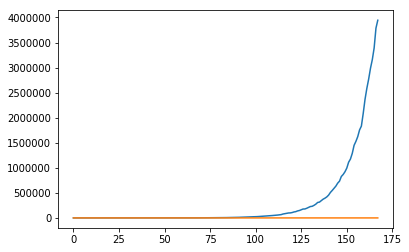

In [20]:
import matplotlib.pyplot as plt
x = [i for i in range(len(our_revenue_progressive)-1)]
plt.plot(x, our_revenue_progressive[1:])
plt.plot(x, lone_pine_revenue_progressive[1:])
plt.plot(x, snp500_close[2:])
plt.xticks([i for i in range(11, 179, 12)],[str(i) for i in range(2006, 2020, 1)], rotation=45)
plt.title("portfolio accumulative return")
plt.xlabel("year")
plt.ylabel("return rate")
plt.show()

In [40]:
final_df

,date,ticker,class
0,200502,A,0
1,200502,ADP,0
2,200502,ADTN,0
3,200502,AET,0
4,200502,AKAM,0
5,200502,AMTD,0
6,200502,AMX,L
7,200502,ANF,A
8,200502,APOL,A
9,200502,AZN,0


In [43]:
test = tool.f13_data.merge(final_df, left_on=['Ticker', 'Date'], right_on=['ticker', 'date'])

In [68]:
len(test[test['date']=='201709'])

18

In [57]:
len(tool.f13_data[tool.f13_data['Date']=='201912'])

49

In [78]:
revenue_rate.portfolio.corr(revenue_rate.lone_pine)

0.8140387418138387

In [16]:
revenue_rate

,date,portfolio,lone_pine,portfolio_progressive,lone_pine_progressive
0,200502,1.082298,0.994608,1.082298e+00,0.994608
1,200503,1.075065,0.973149,1.164000e+00,0.968000
2,200504,1.056912,1.077206,1.230000e+00,1.043000
3,200505,1.107463,1.195630,1.362000e+00,1.247000
4,200506,1.074384,1.071075,1.463000e+00,1.335000
5,200507,1.122506,1.017617,1.642000e+00,1.359000
6,200508,1.057531,0.978628,1.737000e+00,1.330000
7,200509,1.091461,1.057418,1.896000e+00,1.406000
8,200510,1.047318,1.085776,1.986000e+00,1.527000
9,200511,1.104772,1.067688,2.194000e+00,1.630000


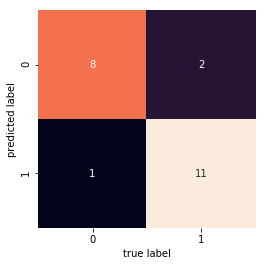

In [55]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [2]:
f13_data = tool.f13_data
price_data = tool.price_data

# season_date_list = ['201909', '201906', '201903', '201812']
f13_data = f13_data[f13_data['Date'].isin(season_date_list)]

all_date = sorted(list(set(price_data['Date'].astype('int'))))
final = pd.DataFrame(columns=['ticker', 'class', 'volatility', 'liquidity', '52 week high', 'momentum'])
for date, df in f13_data.groupby('Date'):
    index = all_date.index(int(date))
    start = index - 12
    end = index
    if start < 0:
        start = 0
    last_12month = all_date[start:end]
    last_12month = [str(i) for i in last_12month]
    last_year_price = price_data[price_data['Date'].isin(last_12month)]
    df = last_year_price.merge(df[['Ticker', 'Class']], on=['Ticker', 'Class'])
    for group, df1 in df.groupby(['Ticker', 'Class']):
        ticker, cls = group
        max_price = max(df1['ASKHI'])
        min_price = min(df1['BIDLO'])
        week_high = max_price / min_price
        df1 = df1.sort_values('Date').reset_index(drop=True)
        df_len = len(df1)
        mom = np.mean(df1[df_len-2:df_len]['PRC']) / np.mean(df1['PRC'])
        df1 = df1[df1['Date']==last_12month[-1]].reset_index(drop=True)
        vol = df1['VOL'][0]
        liq = vol / df1['SHROUT'][0]
        final.loc[-1] = [ticker, cls, vol, liq, week_high, mom]
        final = final.reset_index(drop=True)

In [5]:
final

,ticker,class,volatility,liquidity,52 week high,momentum
0,ADBE,0,813790.0,1.668755,1.644324,1.068183
1,ADSK,0,511872.0,2.337219,1.514451,1.051375
2,AMZN,0,1393304.0,2.849473,1.798589,1.008797
3,ATVI,0,2455742.0,3.218320,1.696988,0.850249
4,BABA,0,4563960.0,4.019301,1.580897,0.850474
5,BKNG,0,93368.0,2.015282,1.260313,0.934180
6,CP,0,126167.0,0.884749,1.299009,1.077932
7,CRM,0,1657478.0,2.166638,1.606710,1.073983
8,CSX,0,1036978.0,1.228036,1.495938,1.103365
9,EA,0,963326.0,3.188459,1.801500,0.747773
